<center>
<h1>COURSE CODE : PH6130
<h1>SAI KRISHNA
<h1>PH22MSCST11003


# <h1>Queston1
<h4>In class, we showed histograms of standard deviation and σG of bootstrap
samples drawn from a Gaussian distribution with mean equal to 0 and
standard deviation equal to 1. Draw a similar histogram of median of
10,000 bootstrap samples drawn from the same Gaussian distribution.
According to http://tinyurl.com/h6p43o8, the standard deviation of
the sample median of a Gaussian distribution is equal to p π
2n
. Overlay a
Gaussian distribution on top of the histogram with mean equal to the mean
of the generated data sample and standard deviation equal to the standard
deviation of the median (Hint: Look up astroML.stats.median sigmaG.
Also note that you don’t have to draw 10,000 histograms, but only one
histogram consisting of 10,000 bootstrap resamples.)

In [ ]:
import scipy
from astroML.stats import median_sigmaG
import numpy as np
import matplotlib.pyplot as plt
from astroML.stats import sigmaG


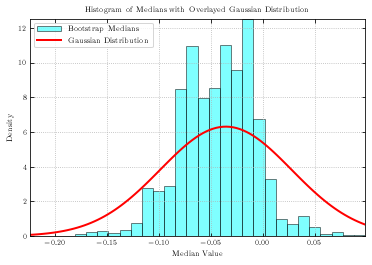

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bootstrap(data, n_bootstraps, sample_size):
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(n_bootstraps, sample_size), replace=True)
    return bootstrap_samples

# Generate Gaussian distribution
mu = 0
sigma = 1
original_data = np.random.normal(mu, sigma, 1000)

# Number of bootstrap samples and sample size
n_samples = 10000
sample_size = 1000

# Generate bootstrap samples and compute statistics
bootstrap_samples = bootstrap(original_data, n_samples, sample_size)
medians = np.median(bootstrap_samples, axis=1)

# Plot histogram of medians
plt.hist(medians, bins=30, density=True, alpha=0.5, color='cyan', label='Bootstrap Medians')

# Compute standard deviation of the median
std_median = 2 * sigma / np.sqrt(sample_size)

# Compute mean of the original data sample
mean_original = np.mean(original_data)

# Overlay Gaussian distribution with mean and standard deviation
x = np.linspace(min(medians), max(medians), 100)
gaussian = norm.pdf(x, mean_original, std_median)
plt.plot(x, gaussian, 'r-', linewidth=2, label='Gaussian Distribution')

# Add labels and title
plt.xlabel('Median Value')
plt.ylabel('Density')
plt.title('Histogram of Medians with Overlayed Gaussian Distribution')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<h1>Question 2
    <h4>arXiv:1008.4686, Exercise 1 on Page 5, except the last sentence of the
question related to σ
2
m. (Hint : Use χ

2 minimization to obtain best-fit
values of b and m, instead of linear algebra. You can look up curve fit
function in scipy.)

In [204]:
y = [592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344]
x = [201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146]
sigy = [61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22]
x=x[4:]
y=y[4:]
sigy=sigy[4:]
x=np.array(x)
y=np.array(y)
sigy=np.array(sigy)

def f(x, m=1, b=324):
    return (m * x) + b

a,b=scipy.optimize.curve_fit(f, x, y, sigma=sigy)
print(a)
# a is the contains the values Optimal values for the parameters so that the sum of the squared residuals of ``f(xdata, *popt) - ydata`` is minimized

[ 2.23992086 34.04772358]


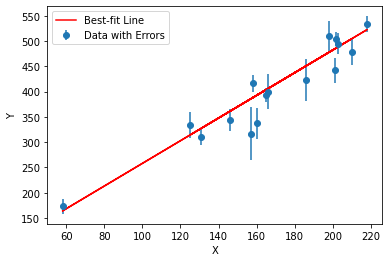

In [206]:
# so plotting best fit with parametrs values set to the above result

m = a[0]
b = a[1]
yi = (m * x) + b

fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=sigy, fmt='o', label='Data with Errors')

ax.plot(x, m * x + b, color='red', label='Best-fit Line')

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.legend()

plt.show()


<h1>Question 3
    <h4>Calculate the p-value for the four chi-square values for the plot shown in
class from astroMl book which can be found at https://www.astroml.
org/book_figures_1ed/chapter4/fig_chi2_eval.html.
        
        
<br>(Hint : You can read off the χ 2 values from the graph by multiplying by D.O.F.)

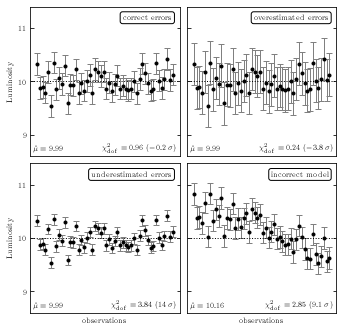

In [214]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Dataset
np.random.seed(1)

N = 50
L0 = 10
dL = 0.2

t = np.linspace(0, 1, N)
L_obs = np.random.normal(L0, dL, N)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

y_vals = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs = [dL, dL * 2, dL / 2, dL]
titles = ['correct errors',
          'overestimated errors',
          'underestimated errors',
          'incorrect model']
p_value=[]
for i in range(4):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[])

    # compute the mean and the chi^2/dof
    mu = np.mean(y_vals[i])
    z = (y_vals[i] - mu) / y_errs[i]
    chi2 = np.sum(z ** 2)
    v1=scipy.stats.chi2((N - 1)).pdf(chi2)
    chi2dof = chi2 / (N - 1)
    p_value.append(v1)

    # compute the standard deviations of chi^2/dof
    sigma = np.sqrt(2. / (N - 1))
    nsig = (chi2dof - 1) / sigma

    # plot the points with errorbars
    ax.errorbar(t, y_vals[i], y_errs[i], fmt='.k', ecolor='gray', lw=1)
    ax.plot([-0.1, 1.3], [L0, L0], ':k', lw=1)

    # Add labels and text
    ax.text(0.95, 0.95, titles[i], ha='right', va='top',
            transform=ax.transAxes,
            bbox=dict(boxstyle='round', fc='w', ec='k'))
    ax.text(0.02, 0.02, r'$\hat{\mu} = %.2f$' % mu, ha='left', va='bottom',
            transform=ax.transAxes)
    ax.text(0.98, 0.02,
            r'$\chi^2_{\rm dof} = %.2f\, (%.2g\,\sigma)$' % (chi2dof, nsig),
            ha='right', va='bottom', transform=ax.transAxes)

    # set axis limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(8.6, 11.4)

    # set ticks and labels
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    

    if i > 1:
        ax.set_xlabel('observations')

    if i % 2 == 0:
        ax.set_ylabel('Luminosity')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.show()

In [219]:
for i in range(4):
    print(f"\n the p_value of {titles[i]} :: ",p_value[i])


 the p_value of correct errors ::  0.041002101733269125

 the p_value of overestimated errors ::  1.3172808322230967e-08

 the p_value of underestimated errors ::  1.3806630935818794e-18

 the p_value of incorrect model ::  4.213889554017695e-11
